In [105]:
import tensorflow as tf
import random
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import pickle
from math import sqrt

def accuracy(predictions, labels):
    return (100.0 * np.sum([np.min(a) for a in np.argmax(predictions, 2).T == labels])\
            / predictions.shape[1])

## 1. Load the data

In [2]:
fileObject = open('../pickles/mnist_seq','r')  
mnist_seq = pickle.load(fileObject)  

In [3]:
train_dataset = mnist_seq["train_dataset"]
train_labels =  mnist_seq["train_labels"]  
test_dataset =  mnist_seq["test_dataset"]  
test_labels =   mnist_seq["test_labels"]   
valid_dataset = mnist_seq["valid_dataset"] 
valid_labels =  mnist_seq["valid_labels"]  

## 2. Model

### 2.1 Model architecture

In [8]:
IMAGE_SIZE = 48
NUM_CHANNELS = 1
NUM_LABELS = 11

N=6

BATCH_SIZE = 50
FILTER_SIZE = 5

NUM_FILTERS_1 = 16
NUM_FILTERS_2 = 32
NUM_FILTERS_3 = 64

NUM_NEURONS = 1024

keep_prob = 0.8

tf_train_dataset = tf.placeholder(tf.float32, shape=(BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, NUM_CHANNELS))
tf_train_labels = tf.placeholder(tf.int64, shape=(BATCH_SIZE, N))
tf_valid_dataset = tf.constant(valid_dataset) 
tf_test_dataset = tf.constant(test_dataset)

## 1st convolutional layer
conv1_weights = tf.get_variable("conv1_w", shape=[FILTER_SIZE, FILTER_SIZE, NUM_CHANNELS, NUM_FILTERS_1],\
                                                initializer=tf.contrib.layers.xavier_initializer_conv2d())
conv1_biases = tf.Variable(tf.zeros([NUM_FILTERS_1]), name = "conv1_b")

## 2nd convolutional layer
conv2_weights = tf.get_variable("conv2_w", shape=[FILTER_SIZE, FILTER_SIZE, NUM_FILTERS_1, NUM_FILTERS_2],\
                                                initializer=tf.contrib.layers.xavier_initializer_conv2d())
conv2_biases = tf.Variable(tf.constant(1.0, shape=[NUM_FILTERS_2]), name = "conv2_b")
  
## 3rd convolutional layer
conv3_weights = tf.get_variable("conv3_w", shape=[FILTER_SIZE, FILTER_SIZE, NUM_FILTERS_2, NUM_FILTERS_3],\
                                                initializer=tf.contrib.layers.xavier_initializer_conv2d())
conv3_biases = tf.Variable(tf.constant(1.0, shape=[NUM_FILTERS_3]), name = "conv3_b")



## fully connected layer:
fc1_weights = tf.get_variable("fc1_w", shape=[IMAGE_SIZE // 8 * IMAGE_SIZE // 8 * NUM_FILTERS_3, NUM_NEURONS],\
                                              initializer=tf.contrib.layers.xavier_initializer())
fc1_biases = tf.Variable(tf.constant(1.0, shape=[NUM_NEURONS]), name="fc1_b")


fc2_weights_L = tf.get_variable("fc2_Lw", shape=[NUM_NEURONS, N],\
                                initializer=tf.contrib.layers.xavier_initializer())
fc2_biases_L = tf.Variable(tf.constant(1.0, shape=[N]), name="fc2_Lb")

fc2_weights_1 = tf.get_variable("fc2_1w", shape=[NUM_NEURONS, NUM_LABELS],\
                                initializer=tf.contrib.layers.xavier_initializer())                                                
fc2_biases_1 = tf.Variable(tf.constant(1.0, shape=[NUM_LABELS]), name="fc2_1b")
  
fc2_weights_2 = tf.get_variable("fc2_2w", shape=[NUM_NEURONS, NUM_LABELS],\
                                initializer=tf.contrib.layers.xavier_initializer())    
fc2_biases_2 = tf.Variable(tf.constant(1.0, shape=[NUM_LABELS]), name="fc2_2b")

fc2_weights_3 = tf.get_variable("fc2_3w", shape=[NUM_NEURONS, NUM_LABELS],\
                                initializer=tf.contrib.layers.xavier_initializer())    
fc2_biases_3 = tf.Variable(tf.constant(1.0, shape=[NUM_LABELS]), name="fc2_3b")

fc2_weights_4 = tf.get_variable("fc2_4w", shape=[NUM_NEURONS, NUM_LABELS],\
                                initializer=tf.contrib.layers.xavier_initializer())    
fc2_biases_4 = tf.Variable(tf.constant(1.0, shape=[NUM_LABELS]), name="fc2_4b")

fc2_weights_5 = tf.get_variable("fc2_5w", shape=[NUM_NEURONS, NUM_LABELS],\
                                initializer=tf.contrib.layers.xavier_initializer())    
fc2_biases_5 = tf.Variable(tf.constant(1.0, shape=[NUM_LABELS]), name="fc2_5b")

  
# Model:
def model(data, keep_prob = keep_prob):    
    
    # 1st Conv Layer +ReLu+max pooling (a pooling window of 2, and a stride of 2)
    conv = tf.nn.conv2d(data, conv1_weights, [1, 1, 1, 1], padding='SAME')
    relu = tf.nn.relu(tf.nn.bias_add(conv, conv1_biases))
    pool = tf.nn.max_pool(relu, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME') 
    #pool = tf.nn.dropout(pool, keep_prob)
    
    # 2nd Conv Layer +ReLu+max pooling (a pooling window of 2, and a stride of 2)
    conv = tf.nn.conv2d(pool, conv2_weights, [1, 1, 1, 1], padding='SAME')
    relu = tf.nn.relu(tf.nn.bias_add(conv, conv2_biases))
    pool = tf.nn.max_pool(relu, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    #pool = tf.nn.dropout(pool, keep_prob)
    
    # 3rd Conv Layer +ReLu+max pooling (a pooling window of 2, and a stride of 2)
    conv = tf.nn.conv2d(pool, conv3_weights, [1, 1, 1, 1], padding='SAME')
    relu = tf.nn.relu(tf.nn.bias_add(conv, conv3_biases))
    pool = tf.nn.max_pool(relu, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    #pool = tf.nn.dropout(pool, keep_prob)
    
    # Flatten layer   
    layer_shape = pool.get_shape()
    num_features = layer_shape[1:4].num_elements()   
    layer_flat = tf.reshape(pool, [-1, num_features])
    
    # Fully connected  
    hidden = tf.nn.relu(tf.matmul(layer_flat, fc1_weights) + fc1_biases)
    hidden = tf.nn.dropout(hidden, keep_prob)
    
    return tf.matmul(
        hidden, fc2_weights_L) + fc2_biases_L,\
        tf.matmul(hidden, fc2_weights_1) + fc2_biases_1,\
        tf.matmul(hidden, fc2_weights_2) + fc2_biases_2,\
        tf.matmul(hidden, fc2_weights_3) + fc2_biases_3,\
        tf.matmul(hidden, fc2_weights_4) + fc2_biases_4,\
        tf.matmul(hidden, fc2_weights_5) + fc2_biases_5
        
  
 # Training computation:
logits_L, logits_1, logits_2, logits_3, logits_4, logits_5 = model(tf_train_dataset)
loss_L = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits_L, tf_train_labels[:,0]))
loss_1 = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits_1, tf_train_labels[:,1]))
loss_2 = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits_2, tf_train_labels[:,2]))
loss_3 = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits_3, tf_train_labels[:,3]))
loss_4 = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits_4, tf_train_labels[:,4]))
loss_5 = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits_5, tf_train_labels[:,5]))

  
loss = loss_L+loss_1+loss_2+loss_3+loss_4+loss_5
    
# Optimizer:
optimizer = tf.train.AdagradOptimizer(0.01).minimize(loss)

**Predictions for the training, validation, and test data**

In [9]:
train_prediction_L = tf.nn.softmax(logits_L)

train_prediction = tf.pack([
                      tf.nn.softmax(logits_1),\
                      tf.nn.softmax(logits_2),\
                      tf.nn.softmax(logits_3),\
                      tf.nn.softmax(logits_4),\
                      tf.nn.softmax(logits_5)])

valid_prediction_L = tf.nn.softmax(model(tf_valid_dataset)[0])

valid_prediction =  tf.pack([
                      tf.nn.softmax(model(tf_valid_dataset)[1]),\
                      tf.nn.softmax(model(tf_valid_dataset)[2]),\
                      tf.nn.softmax(model(tf_valid_dataset)[3]),\
                      tf.nn.softmax(model(tf_valid_dataset)[4]),\
                      tf.nn.softmax(model(tf_valid_dataset)[5])])

test_prediction_L = tf.nn.softmax(model(tf_test_dataset)[0])

test_prediction = tf.pack([
                      tf.nn.softmax(model(tf_test_dataset)[1]),\
                      tf.nn.softmax(model(tf_test_dataset)[2]),\
                      tf.nn.softmax(model(tf_test_dataset)[3]),\
                      tf.nn.softmax(model(tf_test_dataset)[4]),\
                      tf.nn.softmax(model(tf_test_dataset)[5])])

## 2.2. Train the model, report accuracy

In [106]:
NUM_ITERATIONS = 10001

pred = []

with tf.Session() as session:
    tf.global_variables_initializer().run()
    
    for i in range(NUM_ITERATIONS):
        offset = (i * BATCH_SIZE) % (train_labels.shape[0] - BATCH_SIZE)
        batch_data = train_dataset[offset:(offset + BATCH_SIZE), :, :, :]
        batch_labels = train_labels[offset:(offset + BATCH_SIZE),:] 
        feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels}
        _, l, predictions = session.run([optimizer, loss, train_prediction], feed_dict=feed_dict) 
        
        #print i, np.sum([np.min(a) for a in np.argmax(predictions, 2).T == batch_labels[:,1:6]]),\
        #predictions.shape[1]
        
        if (i % 1000 == 0): ## info will be printed every 500th time
            print("Minibatch loss at step %d: %f" % (i, l))
            print("Minibatch accuracy: %.1f%%" % accuracy(predictions, batch_labels[:,1:6]))
            print('Validation accuracy: %.1f%%' % accuracy(valid_prediction.eval(), valid_labels[:,1:6]))    
    print("\nTest accuracy: %.1f%%" % accuracy(test_prediction.eval(), test_labels[:,1:6]))
    
    #w = session.run(weights)
    #weights_list.append(w)
   
    pred.append(np.argmax(test_prediction.eval(), 2).T)

pred = pred[0]
#weights_list = weights_list[0]

Minibatch loss at step 0: 232.848557
Minibatch accuracy: 0.0%
Validation accuracy: 0.4%
Minibatch loss at step 1000: 1.204889
Minibatch accuracy: 72.0%
Validation accuracy: 72.3%
Minibatch loss at step 2000: 0.747512
Minibatch accuracy: 82.0%
Validation accuracy: 81.1%
Minibatch loss at step 3000: 0.557873
Minibatch accuracy: 82.0%
Validation accuracy: 83.5%
Minibatch loss at step 4000: 0.344259
Minibatch accuracy: 90.0%
Validation accuracy: 84.8%
Minibatch loss at step 5000: 0.461651
Minibatch accuracy: 86.0%
Validation accuracy: 85.7%
Minibatch loss at step 6000: 0.446051
Minibatch accuracy: 84.0%
Validation accuracy: 86.5%
Minibatch loss at step 7000: 0.383091
Minibatch accuracy: 90.0%
Validation accuracy: 87.2%
Minibatch loss at step 8000: 0.101021
Minibatch accuracy: 96.0%
Validation accuracy: 87.3%
Minibatch loss at step 9000: 0.066576
Minibatch accuracy: 96.0%
Validation accuracy: 87.2%
Minibatch loss at step 10000: 0.152305
Minibatch accuracy: 94.0%
Validation accuracy: 87.7%



In [122]:
correct = [e for e,y in enumerate(pred == test_labels[:,1:6]) if min(y) == True]
incorrect = [e for e,y in enumerate(pred == test_labels[:,1:6]) if min(y) == False]

images_incorrect = test_dataset[incorrect]
cls_pred_incorrect = pred[incorrect]
cls_pred_incorrect = [''.join([str(x) for x in list(i) if x!=10]) for i in cls_pred_incorrect]
cls_true_incorrect = test_labels[:,1:6][incorrect]
cls_true_incorrect = [''.join([str(x) for x in list(i) if x!=10]) for i in cls_true_incorrect]

images_correct = test_dataset[correct]
cls_pred_correct = pred[correct]
cls_pred_correct = [''.join([str(x) for x in list(i) if x!=10]) for i in cls_pred_correct]
cls_true_correct = test_labels[:,1:6][correct]
cls_true_correct = [''.join([str(x) for x in list(i) if x!=10]) for i in cls_true_correct]


These images are wrongly classified:


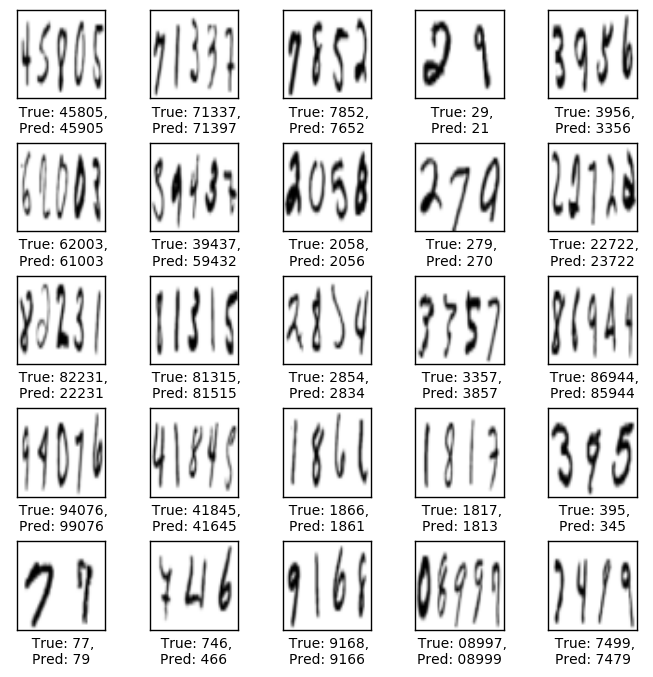

In [128]:
print ('\nThese images are wrongly classified:')

rand_list = random.sample(range(1, images_incorrect.shape[0]), 25)
images = images_incorrect[rand_list,:]

fig, axes = plt.subplots(5,5,figsize=(8, 8))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for i, ax in enumerate(axes.flat):
    ax.imshow(images[i].reshape(48,48), cmap='binary')
    ax.set_xticks([])
    ax.set_yticks([])
    xlabel = "  True: {0}, \nPred: {1}".format(cls_true_incorrect[rand_list[i]], cls_pred_incorrect[rand_list[i]])
    ax.set_xlabel(xlabel)


These images are correctly classified:


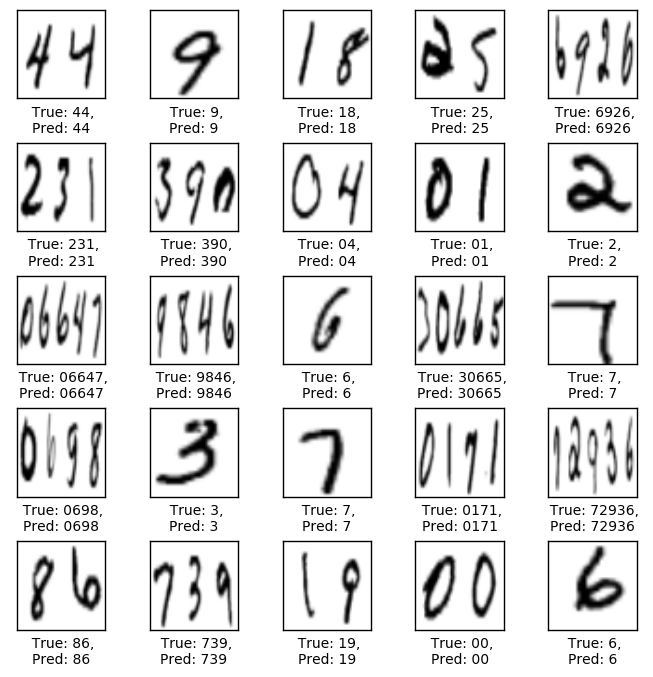

In [129]:
print ('\nThese images are correctly classified:')

rand_list = random.sample(range(1, images_correct.shape[0]), 25)
images = images_correct[rand_list,:]

fig, axes = plt.subplots(5,5,figsize=(8, 8))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for i, ax in enumerate(axes.flat):
    ax.imshow(images[i].reshape(48,48), cmap='binary')
    ax.set_xticks([])
    ax.set_yticks([])
    xlabel = "  True: {0}, \nPred: {1}".format(cls_true_correct[rand_list[i]], cls_pred_correct[rand_list[i]])
    ax.set_xlabel(xlabel)